# Exploratory Data Analysis

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.cluster import FeatureAgglomeration as fa
from sklearn.decomposition import PCA as pca

In [11]:
sns.set()

In [3]:
df = pd.read_csv("../data/MLProjectData.csv")

#### building training and validation datasets

In [4]:
train, valid = train_test_split(df, test_size=0.2, random_state=303)

## Exploring numerical statistics and distributions

In [15]:
df.describe().sort_values(by='50%', axis=1, ascending=False).to_html('df.html')
num_cols_sorted = df.describe().sort_values(by='mean', axis=1, ascending=False).columns

In [16]:
print(num_cols_sorted)
len(num_cols_sorted)

Index(['num59', 'num1', 'num33', 'num34', 'num28', 'num40', 'num29', 'num24',
       'num51', 'num44', 'num25', 'num26', 'num27', 'num39', 'target', 'num2',
       'num8', 'num9', 'num10', 'num11', 'num42', 'num37', 'num38', 'num30',
       'num31', 'num32', 'num23', 'num41', 'num35', 'num36', 'num22', 'num21',
       'num43', 'num58', 'num19', 'num20', 'num18', 'num3', 'num14', 'num7',
       'num13', 'num6', 'num12', 'num5', 'num15', 'num17', 'num16', 'num4',
       'num47', 'num54', 'num50', 'num57', 'num48', 'num55', 'num52', 'num45',
       'num49', 'num56', 'num53', 'num46'],
      dtype='object')


60

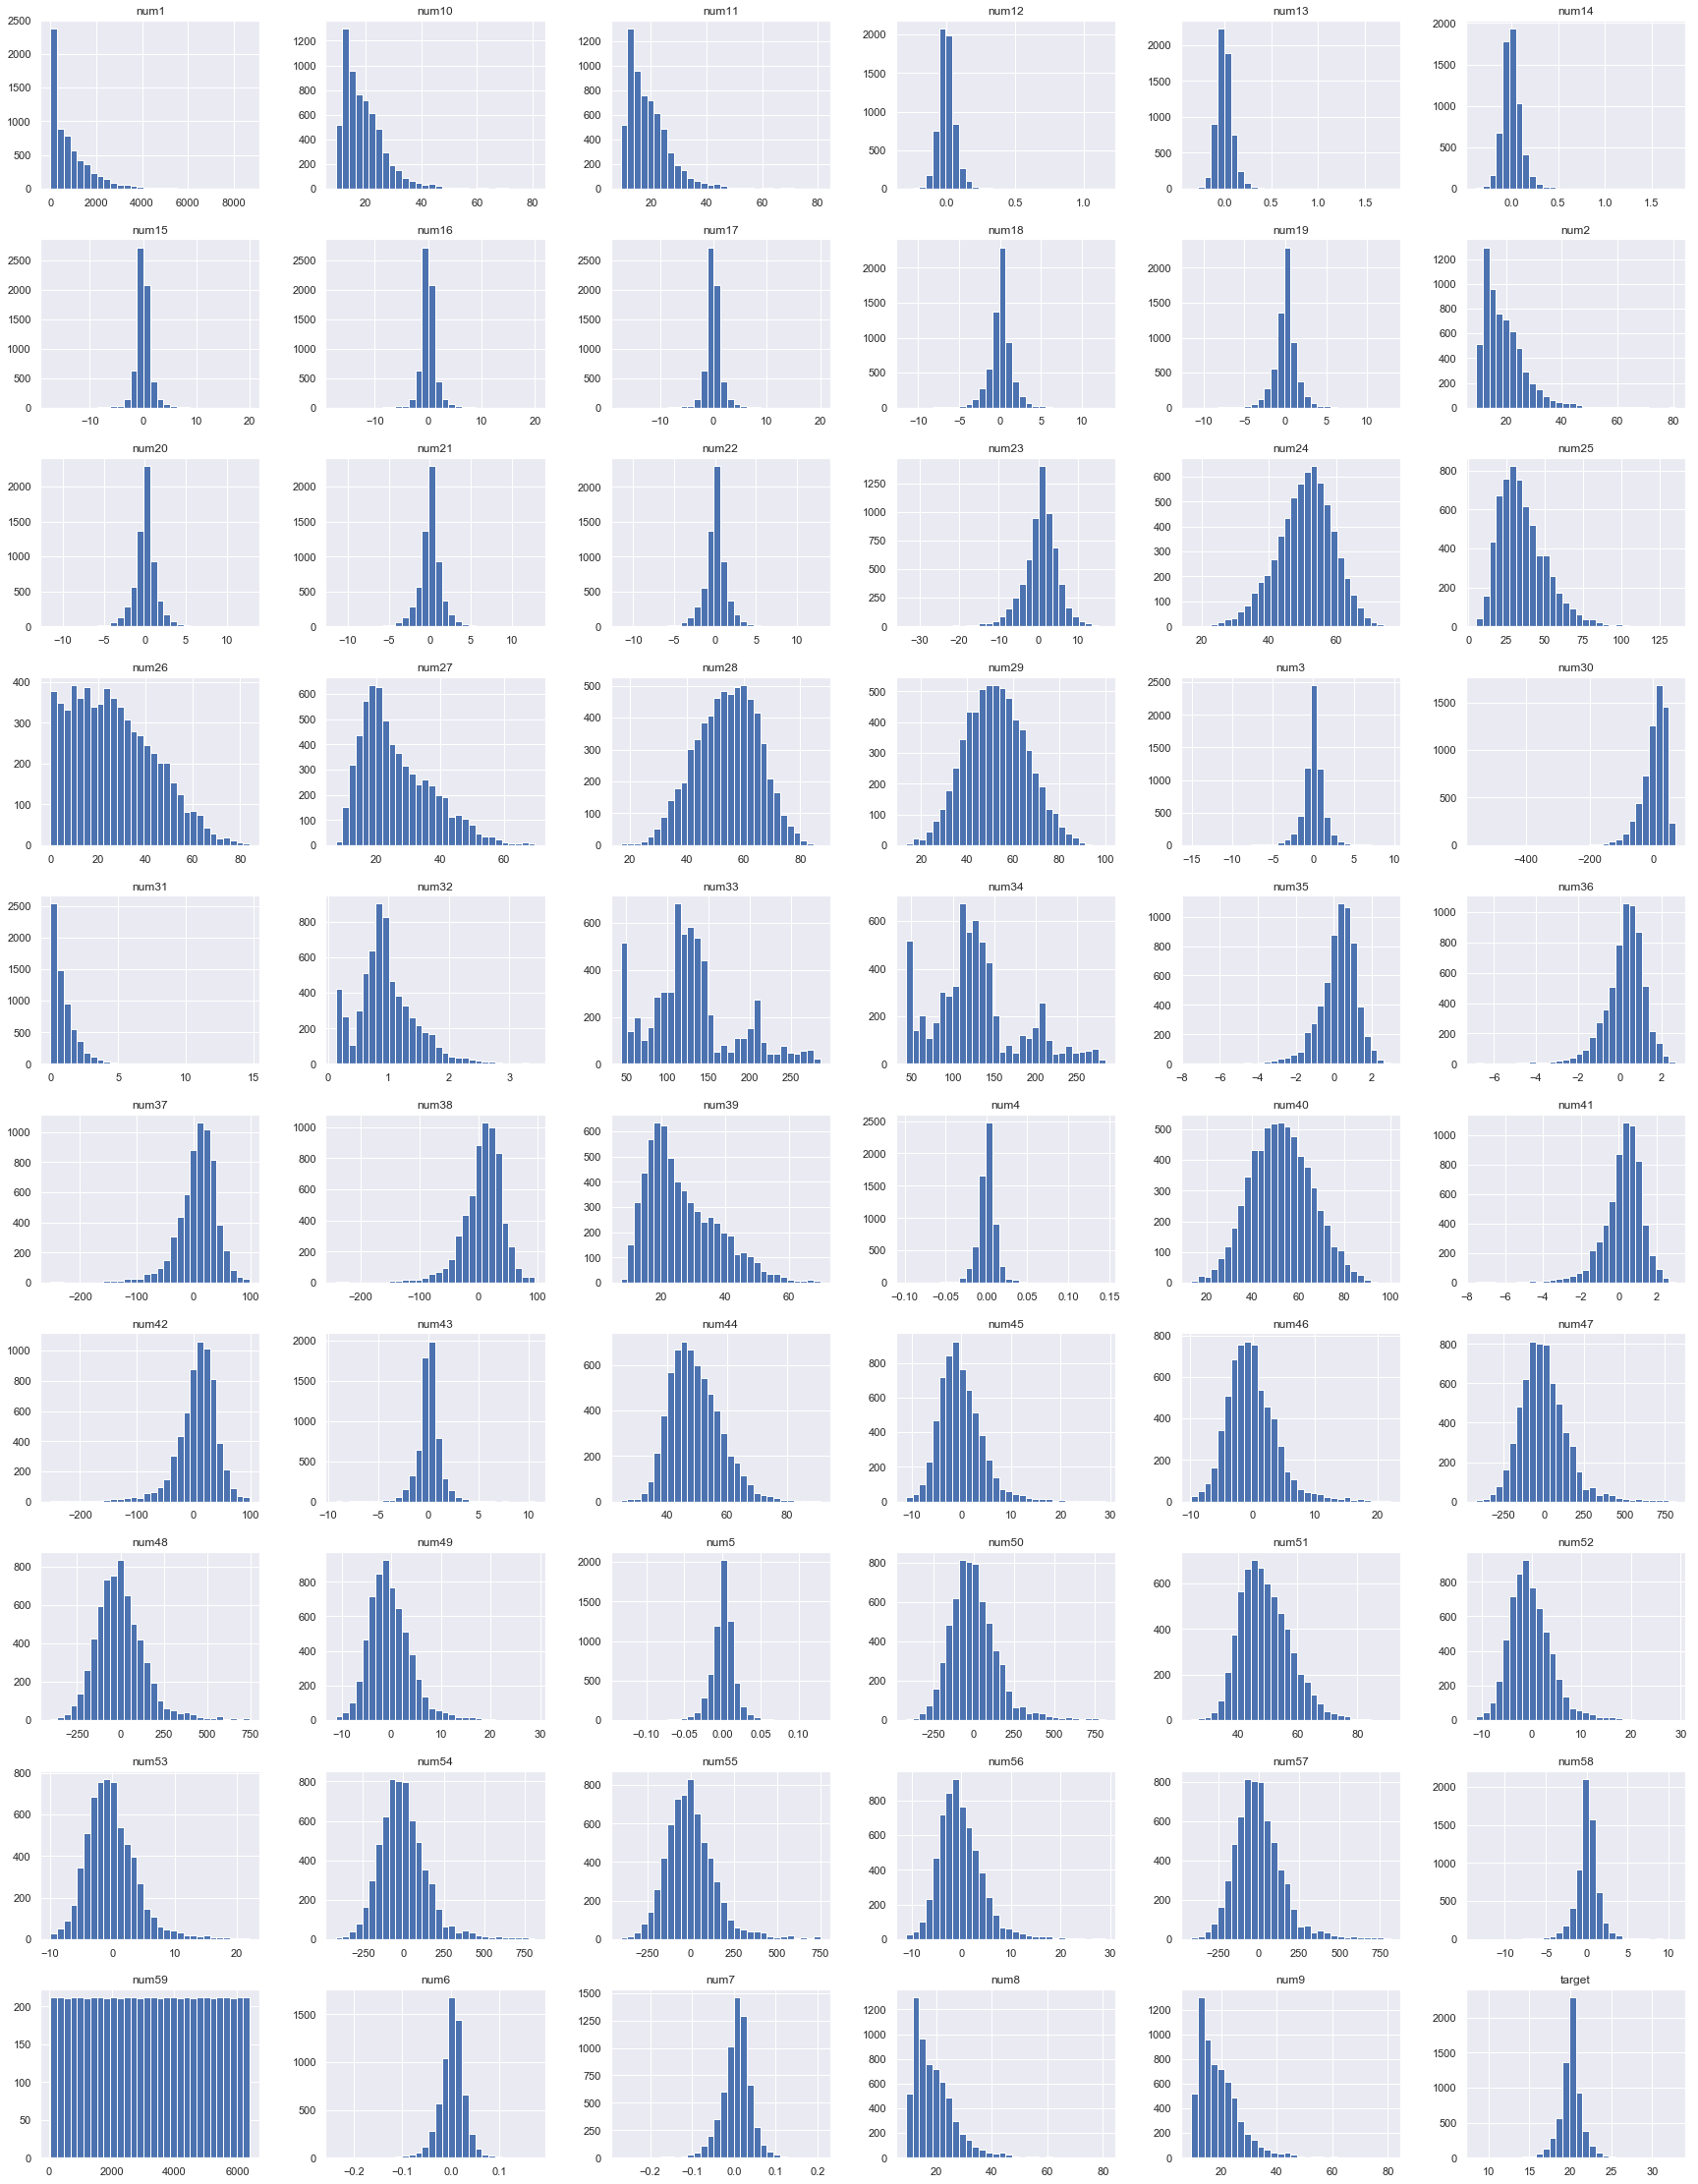

In [17]:
hist = df.hist(column=num_cols_sorted, figsize=(30,40), layout=(10,6), bins=30)

## Building feature clusters based on 15 similar histograms discovered

In [133]:
df_num = train.filter(regex="num*")

In [134]:
agglo = fa(n_clusters=15)

In [135]:
dfa = pd.DataFrame(agglo.fit_transform(df_num))

In [136]:
dfa.shape

(5080, 15)

In [137]:
dfa.describe()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14
count,5080.000000,5080.000000,5080.000000,5080.000000,5080.000000,5080.000000,5080.000000,5080.000000,5080.000000,5080.000000,5080.000000,5080.000000,5080.000000,5080.000000,5080.000000
mean,52.331056,0.085892,6.207697,26.422291,128.453718,19.410581,49.294595,3223.232874,0.866174,1.609405,1.388031,851.440530,1.659532,35.567879,26.316934
std,9.763720,0.741920,36.101669,11.052545,53.184947,8.046863,8.445968,1839.823226,148.878270,39.105483,153.529396,999.122136,153.551294,15.858038,17.274543
min,19.338923,-1.968254,-247.061267,7.407186,43.312450,9.376000,24.368050,53.000000,-402.653900,-555.888989,-419.550500,0.052000,-419.086400,5.017651,0.017569
25%,45.302287,-0.411859,-9.808614,18.060767,95.524688,13.409500,43.182963,1621.750000,-94.823475,-16.565798,-97.095367,67.399000,-96.955490,24.271896,12.073148
50%,52.300903,0.006368,11.048987,23.458657,122.215149,17.526000,48.358490,3225.500000,-14.226170,10.245080,-14.507680,558.510500,-13.808176,32.636340,24.368410
75%,59.412916,0.489113,28.504913,33.498672,146.350000,22.891500,54.660195,4798.250000,76.600516,29.003065,79.186385,1249.903500,79.638160,44.010761,38.272205
max,82.195604,5.242929,96.652567,69.519006,284.944992,72.916000,91.037513,6402.000000,748.015035,69.575310,803.019468,8710.263000,814.407602,135.460232,84.048840


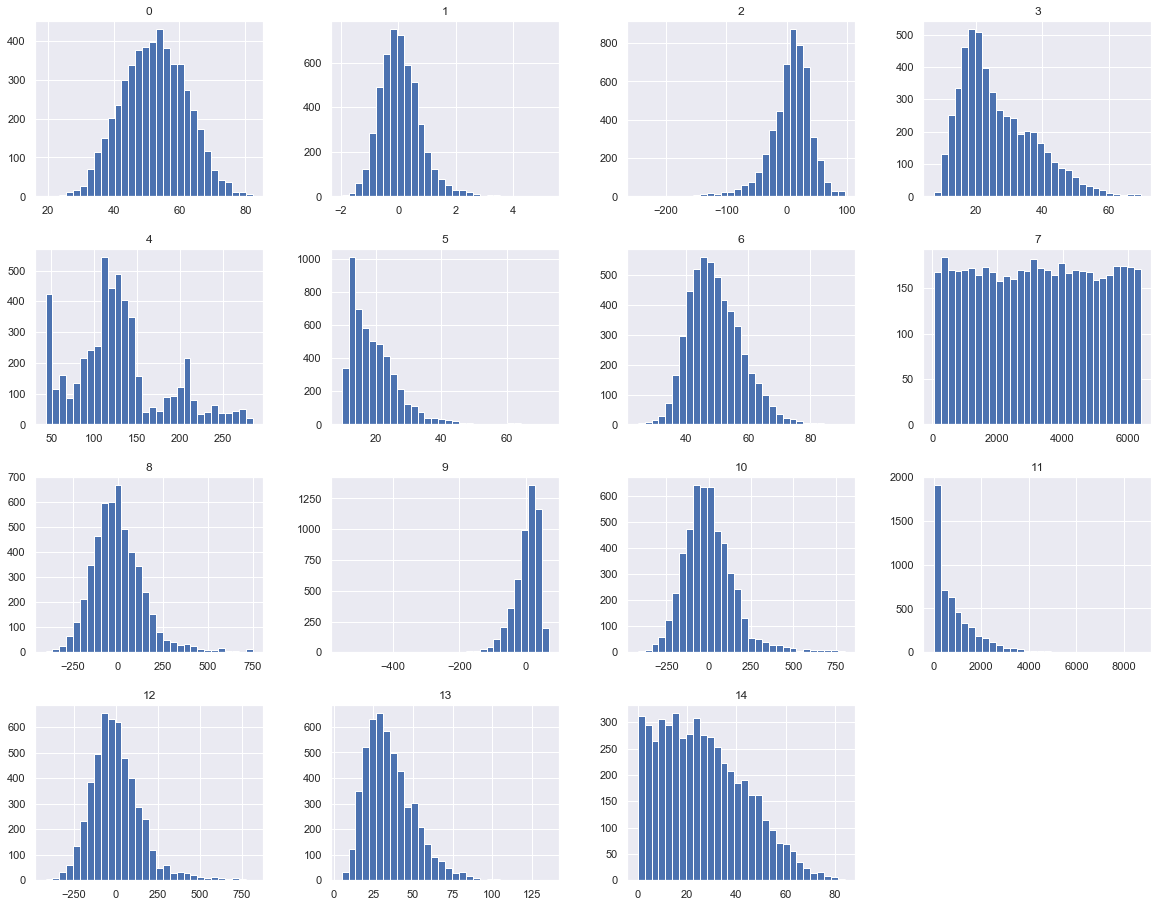

In [48]:
hist_fa = dfa.hist(figsize=(20,20), layout=(5,4), bins=30)

#### Adding 15 new features back to original data

In [138]:
train_cat_y = train.filter(regex="cat*|target")
train_cat_y.index

Int64Index([4261, 2473, 3375, 1160,  874, 6168, 5588, 5362, 6120, 3435,
            ...
            1566,  370, 2248, 5482, 5926, 5109, 5477, 1045, 2578, 5500],
           dtype='int64', length=5080)

In [139]:
train_cat_y.index = pd.RangeIndex(len(train_cat_y.index))
train_cat_y.index

RangeIndex(start=0, stop=5080, step=1)

In [140]:
fa_final = pd.concat([dfa, train_cat_y], axis=1)

In [141]:
fa_final.shape

(5080, 42)

In [142]:
fa_final.to_csv('../data/fa_train.csv')

#### building feature clustering valid dataset

In [99]:
df_num_valid = valid.filter(regex="num*")

In [100]:
agglo = fa(n_clusters=15)

In [101]:
dfa = pd.DataFrame(agglo.fit_transform(df_num_valid))

In [102]:
dfa.shape

(1270, 15)

In [120]:
dfa.index

RangeIndex(start=0, stop=1270, step=1)

In [119]:
valid_cat_y = valid.filter(regex="cat*|target")
valid_cat_y.index

Int64Index([3527, 3590, 3117,  875, 1276,  452, 5726, 6129, 3191, 1372,
            ...
            3536, 2368, 5424,  539, 4569, 1096, 6102, 4804,  699, 5491],
           dtype='int64', length=1270)

In [121]:
valid_cat_y.index = pd.RangeIndex(len(valid_cat_y.index))
valid_cat_y.index

RangeIndex(start=0, stop=1270, step=1)

In [128]:
fa_final = pd.concat([dfa, valid_cat_y], axis=1)

In [129]:
fa_final.shape

(1270, 42)

In [130]:
fa_final.to_csv('../data/fa_valid.csv')

## Comparing to PCA

In [73]:
pca_obj = pca(random_state=303)

In [74]:
pca_obj.fit(df_num)

PCA(copy=True, iterated_power='auto', n_components=None, random_state=303,
  svd_solver='auto', tol=0.0, whiten=False)

#### Cumulative Variance of Components

In [75]:
np.cumsum(pca_obj.explained_variance_ratio_)

array([0.83063459, 0.97030571, 0.99789799, 0.99879552, 0.99932008,
       0.99956973, 0.99977752, 0.99984028, 0.99988009, 0.9999177 ,
       0.99993972, 0.99995558, 0.99996802, 0.99997645, 0.99998235,
       0.99998712, 0.99999074, 0.999993  , 0.99999467, 0.99999584,
       0.99999682, 0.99999764, 0.9999981 , 0.9999985 , 0.99999883,
       0.99999912, 0.99999936, 0.99999949, 0.99999961, 0.99999972,
       0.99999981, 0.99999988, 0.99999992, 0.99999995, 0.99999998,
       0.99999999, 0.99999999, 1.        , 1.        , 1.        ,
       1.        , 1.        , 1.        , 1.        , 1.        ,
       1.        , 1.        , 1.        , 1.        , 1.        ,
       1.        , 1.        , 1.        , 1.        , 1.        ,
       1.        , 1.        , 1.        , 1.        ])

In [76]:
df_pca = pd.DataFrame(pca_obj.fit_transform(df_num))

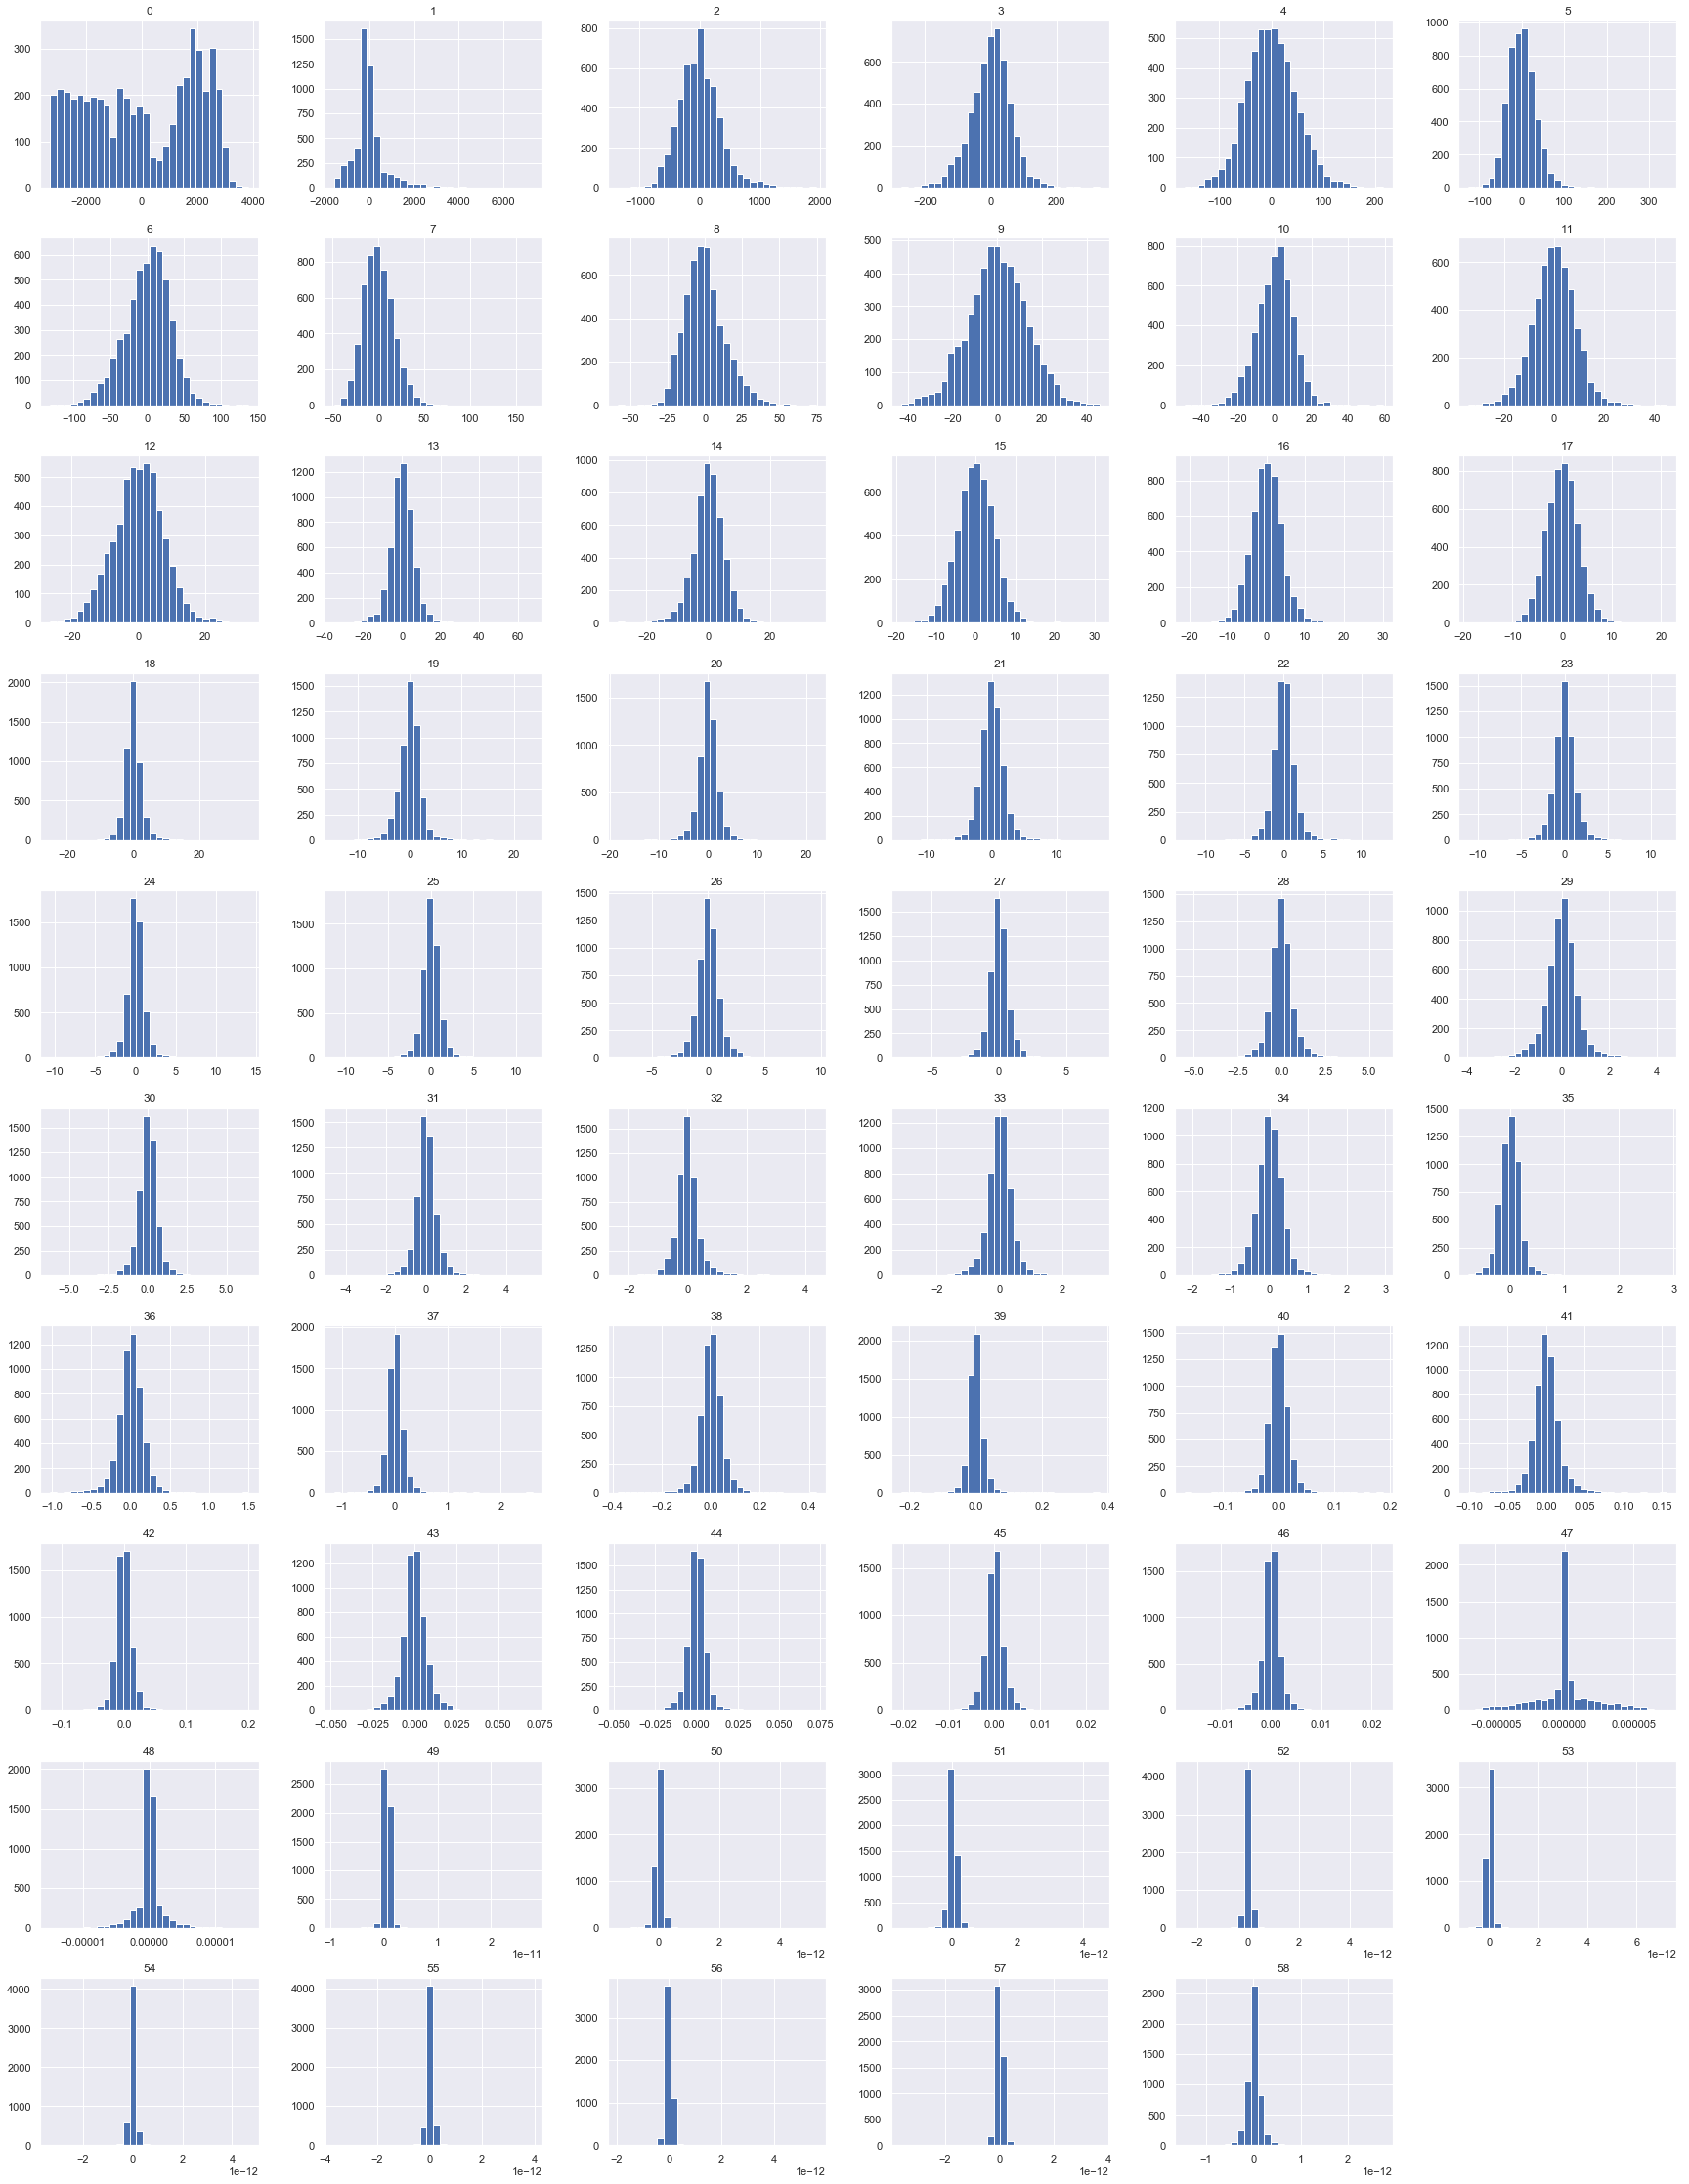

In [77]:
hist_pca = df_pca.hist(figsize=(30,40), layout=(10,6), bins=30)

#### Fitting to data with 3 components

In [143]:
pca_obj3 = pca(n_components=3, random_state=303)

In [144]:
pca_obj3.fit(df_num)

PCA(copy=True, iterated_power='auto', n_components=3, random_state=303,
  svd_solver='auto', tol=0.0, whiten=False)

In [145]:
np.cumsum(pca_obj3.explained_variance_ratio_)

array([0.83063459, 0.97030571, 0.99789799])

In [146]:
df_pca3 = pd.DataFrame(pca_obj3.fit_transform(df_num))

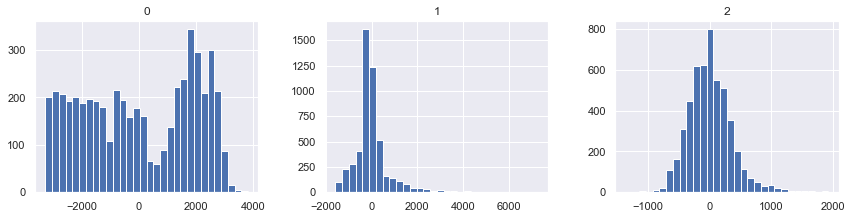

In [83]:
hist_pca = df_pca3.hist(figsize=(30,40), layout=(10,6), bins=30)

#### Adding 3 pca components back to original data

In [147]:
pca_final = pd.concat([df_pca3, train_cat_y], axis=1)

In [148]:
pca_final.shape

(5080, 30)

In [86]:
pca_final.describe(include = 'all')

,0,1,2,cat1,cat2,cat3,cat4,cat5,cat6,cat7,...,cat18,cat19,cat20,cat21,cat22,cat23,cat24,cat25,cat26,target
count,5.080000e+03,5.080000e+03,5.080000e+03,5080,5080,5080,5080,5080,5080,5080,...,5080,5080,5080,5080,5080,5080,5080,5080,5080,5080.000000
unique,NaN,NaN,NaN,5,12,2,2,2,2,2,...,2,2,2,2,2,2,2,2,2,NaN
top,NaN,NaN,NaN,B,C,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,NaN
freq,NaN,NaN,NaN,1057,452,4909,4853,4889,4925,4953,...,5022,4910,4846,4878,4928,5045,5058,4962,5027,NaN
mean,-8.007313e-14,4.671119e-14,1.706422e-15,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,20.038895
std,1.940854e+03,7.958681e+02,3.537379e+02,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.421155
min,-3.271224e+03,-1.580771e+03,-1.368316e+03,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,9.959992
25%,-1.775474e+03,-3.448372e+02,-2.326953e+02,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,19.459998
50%,-8.316733e+01,-1.222486e+02,-1.781438e+01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,20.062500
75%,1.833939e+03,1.674339e+02,2.023664e+02,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,20.681876


In [149]:
pca_final.to_csv('../data/pca_train.csv')

#### building pca valid set

In [150]:
pca_obj3 = pca(n_components=3, random_state=303)

In [151]:
pca_obj3.fit(df_num_valid)

PCA(copy=True, iterated_power='auto', n_components=3, random_state=303,
  svd_solver='auto', tol=0.0, whiten=False)

In [152]:
np.cumsum(pca_obj3.explained_variance_ratio_)

array([0.82405507, 0.97092717, 0.99786488])

In [153]:
df_pca3 = pd.DataFrame(pca_obj3.fit_transform(df_num_valid))

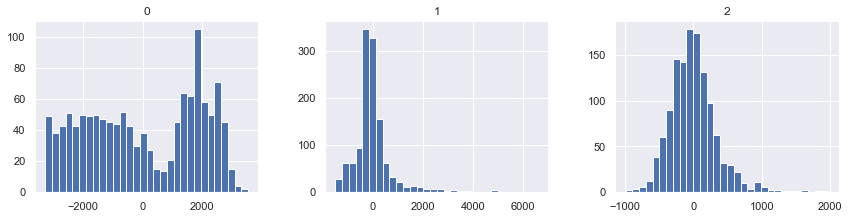

In [95]:
hist_pca = df_pca3.hist(figsize=(30,40), layout=(10,6), bins=30)

In [154]:
pca_final = pd.concat([df_pca3, valid_cat_y], axis=1)

In [155]:
pca_final.shape

(1270, 30)

In [116]:
pca_final.head()

,0,1,2,cat1,cat2,cat3,cat4,cat5,cat6,cat7,...,cat18,cat19,cat20,cat21,cat22,cat23,cat24,cat25,cat26,target
0,-2928.241537,222.599858,320.431035,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2008.812750,-798.209365,23.533301,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,10.964494,-32.980131,13.862337,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,-2697.565442,133.116461,278.788115,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1853.157023,-239.816877,79.996868,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [156]:
pca_final.to_csv('../data/pca_valid.csv')

# PCA

In [1]:
import h2o
from h2o.estimators.pca import H2OPrincipalComponentAnalysisEstimator as h2pca

In [2]:
h2o.init()

Checking whether there is an H2O instance running at http://localhost:54321..... not found.
Attempting to start a local H2O server...
  Java Version: java version "1.8.0_172"; Java(TM) SE Runtime Environment (build 1.8.0_172-b11); Java HotSpot(TM) 64-Bit Server VM (build 25.172-b11, mixed mode)
  Starting server from /usr/local/anaconda3/lib/python3.5/site-packages/h2o/backend/bin/h2o.jar
  Ice root: /var/folders/fm/z2chdhwn5z3__xvw4bw758hm0000gn/T/tmpsfjtuix8
  JVM stdout: /var/folders/fm/z2chdhwn5z3__xvw4bw758hm0000gn/T/tmpsfjtuix8/h2o_davehiltbrand_started_from_python.out
  JVM stderr: /var/folders/fm/z2chdhwn5z3__xvw4bw758hm0000gn/T/tmpsfjtuix8/h2o_davehiltbrand_started_from_python.err
  Server is running at http://127.0.0.1:54321
Connecting to H2O server at http://127.0.0.1:54321... successful.


H2O cluster uptime:,02 secs
H2O cluster timezone:,America/New_York
H2O data parsing timezone:,UTC
H2O cluster version:,3.22.0.1
H2O cluster version age:,22 days
H2O cluster name:,H2O_from_python_davehiltbrand_eye95v
H2O cluster total nodes:,1
H2O cluster free memory:,3.556 Gb
H2O cluster total cores:,8
H2O cluster allowed cores:,8
H2O cluster status:,"accepting new members, healthy"


In [3]:
train = h2o.import_file('../data/train_data.csv')
test = h2o.import_file('../data/valid_data.csv')

Parse progress: |█████████████████████████████████████████████████████████| 100%
Parse progress: |█████████████████████████████████████████████████████████| 100%


### Identify predictors and response

In [22]:
x = train.columns
y = 'target'
x.remove(y)

In [23]:
ml_pca = h2pca(k=15, transform='standardize', seed=303, training_frame = train)

In [24]:
ml_pca.train(x=x, training_frame=train)

pca Model Build progress: |███████████████████████████████████████████████| 100%


/usr/local/anaconda3/lib/python3.5/site-packages/h2o/job.py:69: UserWarning: _train: Dataset used may contain fewer number of rows due to removal of rows with NA/missing values.  If this is not desirable, set impute_missing argument in pca call to TRUE/True/true/... depending on the client language.
  warnings.warn(w)


In [25]:
ml_pca.varimp()

[('Standard deviation',
  4.46545280903257,
  2.9354977454274245,
  2.270448375699896,
  1.9489162206499804,
  1.8442500711912138,
  1.758000950108184,
  1.649848537892869,
  1.3453755743917162,
  1.095652855116754,
  1.0682157056100072,
  1.0021995252011864,
  0.9945517315050414,
  0.9309488429222432,
  0.8684055424220624,
  0.8145046090325112),
 ('Proportion of Variance',
  0.3251903273938001,
  0.14053034530502626,
  0.08406783714223122,
  0.06194310217743787,
  0.05546847537270977,
  0.05040165786709488,
  0.044390983134932685,
  0.02951845946964279,
  0.01957728939231109,
  0.01860906397826425,
  0.01638004144884111,
  0.01613100280564,
  0.01413377730011828,
  0.012298489770835344,
  0.010819163986310913),
 ('Cumulative Proportion',
  0.3251903273938001,
  0.46572067269882633,
  0.5497885098410575,
  0.6117316120184955,
  0.6672000873912052,
  0.7176017452583,
  0.7619927283932327,
  0.7915111878628756,
  0.8110884772551866,
  0.8296975412334509,
  0.8460775826822919,
  0.8622085

In [26]:
ml_pca.summary()

Importance of components: 


,pc1,pc2,pc3,pc4,pc5,pc6,pc7,pc8,pc9,pc10,pc11,pc12,pc13,pc14,pc15
Standard deviation,4.4654528,2.9354977,2.2704484,1.9489162,1.8442501,1.7580010,1.6498485,1.3453756,1.0956529,1.0682157,1.0021995,0.9945517,0.9309488,0.8684055,0.8145046
Proportion of Variance,0.3251903,0.1405303,0.0840678,0.0619431,0.0554685,0.0504017,0.0443910,0.0295185,0.0195773,0.0186091,0.0163800,0.0161310,0.0141338,0.0122985,0.0108192
Cumulative Proportion,0.3251903,0.4657207,0.5497885,0.6117316,0.6672001,0.7176017,0.7619927,0.7915112,0.8110885,0.8296975,0.8460776,0.8622086,0.8763424,0.8886409,0.8994600


In [81]:
ml_pca

Model Details
H2OPrincipalComponentAnalysisEstimator :  Principal Components Analysis
Model Key:  PCA_model_python_1542376854694_9


ModelMetricsPCA: pca
** Reported on train data. **

MSE: NaN
RMSE: NaN
Scoring History for GramSVD: 


,timestamp,duration,iterations
,2018-11-17 17:07:30,0.014 sec,0.0


In [27]:
pca_train = ml_pca.predict(train)

pca prediction progress: |████████████████████████████████████████████████| 100%


In [28]:
pca_train['target'] = train['target']

In [29]:
pca_test = ml_pca.predict(test)

pca prediction progress: |████████████████████████████████████████████████| 100%


In [30]:
pca_test['target'] = test['target']

# h2o AutoML

In [12]:
from h2o.automl import H2OAutoML
import re

In [31]:
x = pca_train.columns
y = 'target'
x.remove(y)

### Run AutoML for 20 base models (limited to 1 hour max runtime by default)

In [32]:
aml20 = H2OAutoML(max_models=20, seed=303)
aml20.train(x=x, y=y, training_frame=pca_train, leaderboard_frame=pca_test)

AutoML progress: |████████████████████████████████████████████████████████| 100%


### View the AutoML Leaderboard

In [33]:
lb = aml20.leaderboard
# Print all rows instead of default (10 rows)
lb.head(rows=lb.nrows) 

model_id,mean_residual_deviance,rmse,mse,mae,rmsle
GLM_grid_1_AutoML_20181118_133645_model_1,1.99072,1.41093,1.99072,0.968266,0.0699476
GBM_grid_1_AutoML_20181118_133645_model_2,1.99413,1.41214,1.99413,0.970402,0.0699559
StackedEnsemble_BestOfFamily_AutoML_20181118_133645,1.99536,1.41257,1.99536,0.974701,0.0698796
StackedEnsemble_AllModels_AutoML_20181118_133645,2.00727,1.41678,2.00727,0.977575,0.0701083
GBM_5_AutoML_20181118_133645,2.02254,1.42216,2.02254,0.973732,0.0705357
XGBoost_grid_1_AutoML_20181118_133645_model_4,2.0424,1.42913,2.0424,0.977314,0.070649
GBM_4_AutoML_20181118_133645,2.04911,1.43147,2.04911,0.978718,0.0710211
GBM_2_AutoML_20181118_133645,2.05076,1.43205,2.05076,0.975448,0.0710292
XGBoost_1_AutoML_20181118_133645,2.05705,1.43424,2.05705,0.97699,0.0711907
DeepLearning_1_AutoML_20181118_133645,2.06464,1.43689,2.06464,1.00601,0.070802


### Best Model Score - MAE = 0.9677976859852252

In [34]:
perf = aml20.leader.model_performance(pca_test)
perf


ModelMetricsRegressionGLM: glm
** Reported on test data. **

MSE: 1.9907216208911254
RMSE: 1.4109293465270065
MAE: 0.9682656582236503
RMSLE: 0.0699475701974165
R^2: 0.0029942112512446606
Mean Residual Deviance: 1.9907216208911254
Null degrees of freedom: 1269
Residual degrees of freedom: 1254
Null deviance: 2536.21148833937
Residual deviance: 2528.216458531729
AIC: 4512.495313980907


### Run AutoML for all base models (limited to 3 hour max runtime)

In [10]:
aml = H2OAutoML(max_runtime_secs=7200, seed=303)
aml.train(x=x, y=y, training_frame=train)

AutoML progress: |████████████████████████████████████████████████████████| 100%


### View the AutoML Leaderboard

In [11]:
lb = aml.leaderboard
# Print all rows instead of default (10 rows)
lb.head(rows=lb.nrows) 

model_id,mean_residual_deviance,rmse,mse,mae,rmsle
GLM_grid_1_AutoML_20181115_204202_model_1,2.01269,1.41869,2.01269,0.953742,0.0695083
GLM_grid_1_AutoML_20181115_214601_model_1,2.01269,1.41869,2.01269,0.953742,0.0695083
GBM_grid_1_AutoML_20181115_204202_model_2,2.01432,1.41927,2.01432,0.954454,0.0694942
GBM_grid_1_AutoML_20181115_214601_model_8,2.01528,1.41961,2.01528,0.954565,0.0695184
GBM_grid_1_AutoML_20181115_214601_model_1,2.01714,1.42026,2.01714,0.954686,0.0695451
DeepLearning_grid_1_AutoML_20181115_214601_model_12,2.01755,1.42041,2.01755,0.957989,0.0696499
GBM_grid_1_AutoML_20181115_214601_model_2,2.01844,1.42072,2.01844,0.954827,0.0695631
GBM_grid_1_AutoML_20181115_214601_model_4,2.01859,1.42077,2.01859,0.954931,0.0695676
GBM_grid_1_AutoML_20181115_214601_model_3,2.01866,1.42079,2.01866,0.955143,0.0695769
StackedEnsemble_BestOfFamily_AutoML_20181115_204202,2.01952,1.4211,2.01952,0.954888,0.0695872


### Best Model Score - MAE = 0.9677976859852252

In [12]:
perf = aml.leader.model_performance(test)
perf


ModelMetricsRegressionGLM: glm
** Reported on test data. **

MSE: 1.989476711887032
RMSE: 1.4104881112178975
MAE: 0.9677976859852252
RMSLE: 0.06995727485183731
R^2: 0.0036176944497597896
Mean Residual Deviance: 1.989476711887032
Null degrees of freedom: 1269
Residual degrees of freedom: 1144
Null deviance: 2536.21148833937
Residual deviance: 2526.6354240965306
AIC: 4731.700863878391


## Running on only numeric data

In [42]:
x = train.columns

In [43]:
import re
regex=re.compile(".*(num).*")
x = [m.group(0) for l in x for m in [regex.search(l)] if m]
y = 'target'

### Run AutoML for 20 base models (limited to 1 hour max runtime by default)

In [46]:
aml20num = H2OAutoML(max_models=20, seed=303)
aml20num.train(x=x, y=y, training_frame=train)

AutoML progress: |████████████████████████████████████████████████████████| 100%


### View the AutoML Leaderboard

In [48]:
lb = aml20num.leaderboard
# Print all rows instead of default (10 rows)
lb.head(rows=lb.nrows) 

model_id,mean_residual_deviance,rmse,mse,mae,rmsle
GBM_grid_1_AutoML_20181115_232552_model_2,2.01149,1.41827,2.01149,0.954151,0.0694471
GLM_grid_1_AutoML_20181115_232552_model_1,2.01244,1.4186,2.01244,0.954002,0.069511
GLM_grid_1_AutoML_20181115_204202_model_1,2.01269,1.41869,2.01269,0.953742,0.0695083
GLM_grid_1_AutoML_20181115_214601_model_1,2.01269,1.41869,2.01269,0.953742,0.0695083
GBM_grid_1_AutoML_20181115_204202_model_2,2.01432,1.41927,2.01432,0.954454,0.0694942
GBM_grid_1_AutoML_20181115_214601_model_8,2.01528,1.41961,2.01528,0.954565,0.0695184
GBM_grid_1_AutoML_20181115_214601_model_1,2.01714,1.42026,2.01714,0.954686,0.0695451
DeepLearning_grid_1_AutoML_20181115_214601_model_12,2.01755,1.42041,2.01755,0.957989,0.0696499
GBM_grid_1_AutoML_20181115_214601_model_2,2.01844,1.42072,2.01844,0.954827,0.0695631
GBM_grid_1_AutoML_20181115_214601_model_4,2.01859,1.42077,2.01859,0.954931,0.0695676


### Best Model Score - MAE = 0.968196242011554

In [49]:
perf = aml20num.leader.model_performance(test)
perf


ModelMetricsRegression: gbm
** Reported on test data. **

MSE: 1.9866142867408734
RMSE: 1.4094730528608461
MAE: 0.968196242011554
RMSLE: 0.06988011858699726
Mean Residual Deviance: 1.9866142867408734


## Running on only categorical data

In [18]:
x = train.columns
z=re.compile(".*(cat).*")
x = list(filter(z.match, x))
y = 'target'

### Run AutoML for 20 base models (limited to 1 hour max runtime by default)

In [19]:
aml20cat = H2OAutoML(max_models=20, seed=303)
aml20cat.train(x=x, y=y, training_frame=train)

AutoML progress: |████████████████████████████████████████████████████████| 100%


### View the AutoML Leaderboard

In [20]:
lb = aml20cat.leaderboard
# Print all rows instead of default (10 rows)
lb.head(rows=lb.nrows) 

model_id,mean_residual_deviance,rmse,mse,mae,rmsle
StackedEnsemble_AllModels_AutoML_20181116_093647,2.01926,1.42101,2.01926,0.954764,0.0695786
GLM_grid_1_AutoML_20181116_093647_model_1,2.01939,1.42105,2.01939,0.954955,0.0695784
StackedEnsemble_BestOfFamily_AutoML_20181116_093647,2.01971,1.42117,2.01971,0.954716,0.0695889
GBM_grid_1_AutoML_20181116_093647_model_2,2.022,1.42197,2.022,0.956032,0.0696179
XGBoost_grid_1_AutoML_20181116_093647_model_4,2.03137,1.42526,2.03137,0.963582,0.0697172
DeepLearning_grid_1_AutoML_20181116_093647_model_2,2.03328,1.42593,2.03328,0.963965,0.0697231
DeepLearning_1_AutoML_20181116_093647,2.0372,1.4273,2.0372,0.963814,0.0698346
GBM_5_AutoML_20181116_093647,2.03846,1.42775,2.03846,0.965521,0.0698872
XGBoost_grid_1_AutoML_20181116_093647_model_2,2.03973,1.42819,2.03973,0.968868,0.0698371
DeepLearning_grid_1_AutoML_20181116_093647_model_1,2.05162,1.43235,2.05162,0.979734,0.0699559


### Best Model Score - MAE = 0.9700703352714898

In [22]:
perf = aml20cat.leader.model_performance(test)
perf


ModelMetricsRegressionGLM: stackedensemble
** Reported on test data. **

MSE: 1.99701691995226
RMSE: 1.4131584907406034
MAE: 0.9700703352714898
RMSLE: 0.07000376486213895
R^2: -0.00015864022732947625
Mean Residual Deviance: 1.99701691995226
Null degrees of freedom: 1269
Residual degrees of freedom: 1269
Null deviance: 2536.21148833937
Residual deviance: 2536.21148833937
AIC: 4486.505123735206


## Use valid data to drive leaderboard

In [23]:
x = train.columns
y = 'target'
x.remove(y)

### Run AutoML for 20 base models (limited to 1 hour max runtime by default)

In [24]:
aml20 = H2OAutoML(max_models=20, seed=303)
aml20.train(x=x, y=y, training_frame=train,leaderboard_frame=test)

AutoML progress: |████████████████████████████████████████████████████████| 100%


### View the AutoML Leaderboard

In [25]:
lb = aml20.leaderboard
# Print all rows instead of default (10 rows)
lb.head(rows=lb.nrows) 

model_id,mean_residual_deviance,rmse,mse,mae,rmsle
GBM_grid_1_AutoML_20181116_100849_model_2,1.98774,1.40987,1.98774,0.96833,0.0698914
GLM_grid_1_AutoML_20181116_100849_model_1,1.98948,1.41049,1.98948,0.967798,0.0699573
StackedEnsemble_AllModels_AutoML_20181116_093647,1.99702,1.41316,1.99702,0.97007,0.0700038
StackedEnsemble_BestOfFamily_AutoML_20181116_093647,1.99702,1.41316,1.99702,0.970068,0.070004
GLM_grid_1_AutoML_20181116_093647_model_1,1.99772,1.41341,1.99772,0.970059,0.0700145
GBM_grid_1_AutoML_20181116_093647_model_2,1.99986,1.41416,1.99986,0.970658,0.0700523
GBM_1_AutoML_20181116_100849,2.00402,1.41563,2.00402,0.972821,0.0699057
XGBoost_grid_1_AutoML_20181116_093647_model_4,2.01123,1.41818,2.01123,0.973832,0.0701905
GBM_5_AutoML_20181116_100849,2.01639,1.42,2.01639,0.979316,0.0704682
XGBoost_grid_1_AutoML_20181116_093647_model_2,2.01749,1.42038,2.01749,0.97763,0.0702798
